<a href="https://colab.research.google.com/github/Va2mne/CIFAR-10/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание объектов на изображениях из набора данных CIFAR-10

Пример из курса ["Программирование глубоких нейронных сетей на Python"](https://www.asozykin.ru/courses/nnpython).

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


In [ ]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


**Просмотр примеров данных**

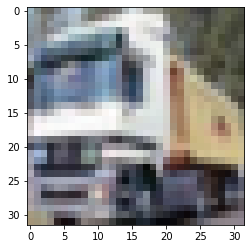

Номер класса: [9]
Тип объекта: грузовик


In [ ]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

**Нормализуем данные**

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем правильные ответы в формат one hot encoding**

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем нейронную сеть

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

**Печатаем информацию о сети**

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

**Компилируем модель**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 6s - loss: 0.3341 - accuracy: 0.8811 - val_loss: 0.6180 - val_accuracy: 0.8104
Epoch 2/25
 - 6s - loss: 0.3335 - accuracy: 0.8807 - val_loss: 0.6155 - val_accuracy: 0.8110
Epoch 3/25
 - 6s - loss: 0.3146 - accuracy: 0.8888 - val_loss: 0.6516 - val_accuracy: 0.8016
Epoch 4/25
 - 6s - loss: 0.3056 - accuracy: 0.8903 - val_loss: 0.6247 - val_accuracy: 0.8110
Epoch 5/25
 - 6s - loss: 0.3103 - accuracy: 0.8905 - val_loss: 0.6238 - val_accuracy: 0.8108
Epoch 6/25
 - 6s - loss: 0.2951 - accuracy: 0.8955 - val_loss: 0.6360 - val_accuracy: 0.8062
Epoch 7/25
 - 6s - loss: 0.2899 - accuracy: 0.8963 - val_loss: 0.6450 - val_accuracy: 0.8106
Epoch 8/25
 - 6s - loss: 0.2859 - accuracy: 0.8981 - val_loss: 0.6394 - val_accuracy: 0.8160
Epoch 9/25
 - 6s - loss: 0.2767 - accuracy: 0.9036 - val_loss: 0.6568 - val_accuracy: 0.8120
Epoch 10/25
 - 6s - loss: 0.2858 - accuracy: 0.8974 - val_loss: 0.6455 - val_accuracy: 0.8088
Epoch 11/25
 - 6s - 

## Оцениваем качетсво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 80.01%


In [ ]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: ignored

## Сохраняем обученную нейронную сеть

In [ ]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [ ]:
!ls

In [ ]:
from google.colab import files

In [ ]:
files.download("cifar10_model.json")

In [ ]:
files.download("cifar10_model.h5")

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

In [ ]:
index=11
plt.imshow(toimage(X_test[index]))
plt.show()

**Преобразование тестового изображения**

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [ ]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [ ]:
print(prediction)

**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

**Печатаем правильный ответ**

In [ ]:
print(classes[y_test[index][0]])

## Распознаем дополнительное изображение

In [ ]:
from google.colab import files

files.upload()

Saving kva.jpeg to kva.jpeg


{'kva.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\n\x07\x07\t\x07\x06\n\t\x08\t\x0b\x0b\n\x0c\x0f\x19\x10\x0f\x0e\x0e\x0f\x1e\x16\x17\x12\x19$ &%# #"(-90(*6+"#2D26;=@@@&0FKE>J9?@=\xff\xdb\x00C\x01\x0b\x0b\x0b\x0f\r\x0f\x1d\x10\x10\x1d=)#)==================================================\xff\xc0\x00\x11\x08\x01|\x02X\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\x

Проверяем загрузку файлов

In [ ]:
!ls

'123 (1).jpg'   cat.jpg    igogo.jpg   mnb.jpg	'poi (1).jpg'   sample_data
 123.jpg        catt.jpg   kva.jpeg    nbv.jpg	 poi.jpg


**Смотрим загруженную картинку**

In [ ]:
img_path = 'kva.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

FileNotFoundError: ignored

**Преобразуем картинку в массив для распознавания**

In [ ]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

лошадь
